In [6]:
import datetime as dt
from nytimes_scraper.nyt_api import NytApi
from nytimes_scraper.articles import fetch_articles_by_month, articles_to_df
from nytimes_scraper.comments import fetch_comments, fetch_comments_by_article, comments_to_df
from nytimes_scraper import run_scraper, scrape_month

api = NytApi('FYkXHSbZsX1UXEq8eA7LLhrO1h6m2GSv')


In [11]:
# # # Fetch articles of a specific month
# articles = fetch_articles_by_month(api, dt.date(2020, 2, 1))
# article_df = articles_to_df(articles)

# # Fetch comments from multiple articles
# # a) using the results of a previous article query
# article_ids_and_urls = list(article_df['web_url'].iteritems())
# comments_a = fetch_comments(api, article_ids_and_urls)
# comment_df = comments_to_df(comments_a)

# # b) using a custom list of articles
# comments_b = fetch_comments(api, article_ids_and_urls=[
#     ('nyt://article/316ef65c-7021-5755-885c-a9e1ef2cfdf2', 'https://www.nytimes.com/2020/01/03/world/middleeast/trump-iran-suleimani.html'),
#     ('nyt://article/b2d1b802-412e-51f7-8864-efc931e87bb3', 'https://www.nytimes.com/2020/01/04/opinion/impeachment-witnesses.html'),
# ])

# # Fetch comment for one specific article by its URL
comments_c = fetch_comments_by_article(api, 'https://www.nytimes.com/2023/05/30/technology/ai-threat-warning.html')

In [12]:
comms = []

for item in comments_c:
    comms.append(item['commentBody'])
    if item['replyCount'] > 0:
        for reply in item['replies']:
            comms.append(reply['commentBody'])


In [117]:
import re 



def preprocess(text):
    text = text.lower()
    text = re.sub(r'{\n\}',r'',text)
    text = re.sub(r'{\n}',r'',text)
    text = re.sub(r'{@}',r'',text)
    txt = ' '.join([word for word in text.split()])
    return txt

In [118]:
new = []

for comment in comms:
    new.append(preprocess(comment))

In [119]:
import csv

def write_list_to_csv(strings, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for string in strings:
            writer.writerow([string])

# Example usage
my_strings = new
write_list_to_csv(my_strings, 'output.csv')

In [120]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

sent = {}

sa = SentimentIntensityAnalyzer()

sa.polarity_scores(comms[0])



{'neg': 0.212, 'neu': 0.733, 'pos': 0.055, 'compound': -0.9916}

In [121]:
comms = new

In [122]:
sen_df = pd.DataFrame(comms, columns=['comment'])

In [123]:
negs = []
for comment in sen_df['comment']:
    negs.append(sa.polarity_scores(comment)['neg'])



In [124]:
neu = []
for comment in sen_df['comment']:
    neu.append(sa.polarity_scores(comment)['neu'])



In [125]:
pos = []
for comment in sen_df['comment']:
    pos.append(sa.polarity_scores(comment)['pos'])



In [126]:
compound = []
for comment in sen_df['comment']:
    compound.append(sa.polarity_scores(comment)['compound'])



In [127]:
sen_df['neg'] = negs
sen_df['neu'] = neu
sen_df['pos'] = pos

In [128]:
sen_df['compound'] = compound

In [129]:
sen_df['value'] = sen_df.max(axis=1)

C:\Users\gsevr\AppData\Local\Temp\ipykernel_15944\3034246993.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sen_df['value'] = sen_df.max(axis=1)


In [130]:

sen_df['sentiment'] = sen_df.apply(lambda x: 'negative' if x['value'] == x['neg'] else 'neutral' if x['value'] == x['neu'] else 'positive', axis=1)


In [137]:
df = sen_df.groupby('sentiment')['sentiment'].value_counts()

In [138]:
pd.DataFrame(df)

,,sentiment
sentiment,sentiment,
neutral,neutral,305
positive,positive,25


In [93]:
import seaborn as sns

In [94]:
neg_mean = sen_df.neg.mean()
neu_mean = sen_df.neu.mean()
pos_mean = sen_df.pos.mean()
com_mean = sen_df.compound.mean()

a = pd.DataFrame([neg_mean,neu_mean,pos_mean,com_mean])

In [95]:
a = a.T
a.columns = ['negative','neutral','positive','compound']
a

,negative,neutral,positive,compound
0,0.067481,0.846397,0.086121,0.070575


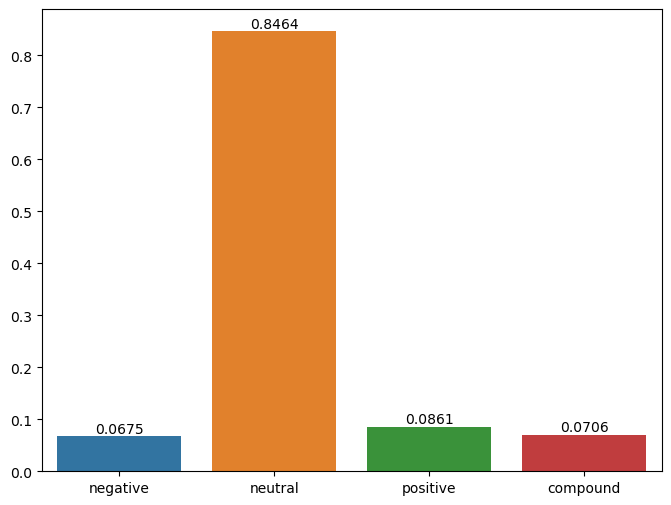

In [96]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(a)
ax.bar_label(ax.containers[0], fmt='%.4f')
plt.show()